In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = 'logs/07-12_22-11_746_250.csv'

In [3]:
df = pd.read_csv(path)

<Axes: xlabel='round'>

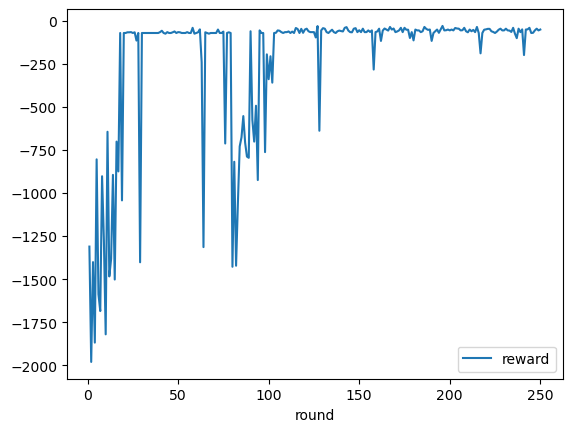

In [4]:
df.groupby(by='round')[['reward']].sum().plot()

<Axes: xlabel='round'>

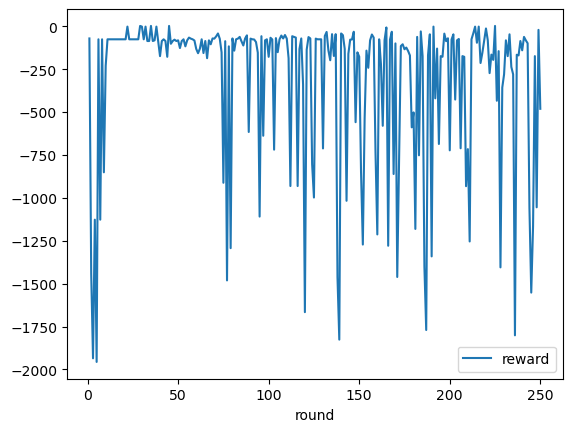

In [5]:
df = pd.read_csv('logs/07-12_22-39_746_250.csv')
df.groupby(by='round')[['reward']].sum().plot()

<Axes: xlabel='round'>

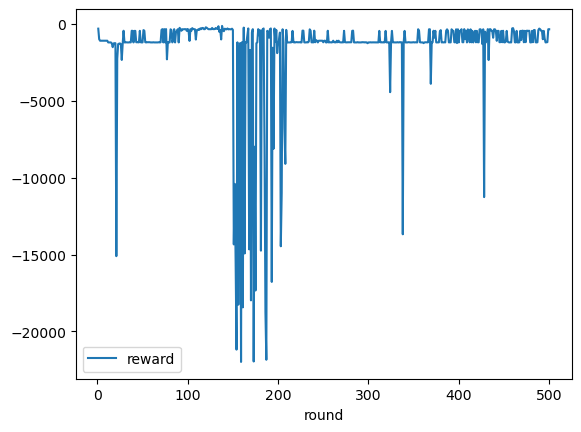

In [3]:
df = pd.read_csv('logs/07-13_10-56_746_500.csv')
df.groupby(by='round')[['reward']].sum().plot()

<Axes: xlabel='round'>

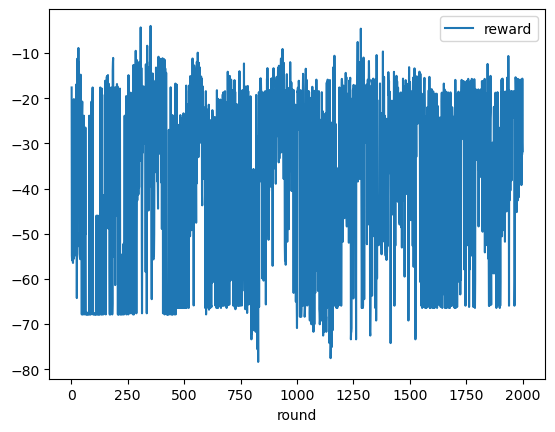

In [5]:
df = pd.read_csv('logs/07-13_11-03_746_2000.csv')
df.groupby(by='round')[['reward']].mean().plot()

<Axes: xlabel='round'>

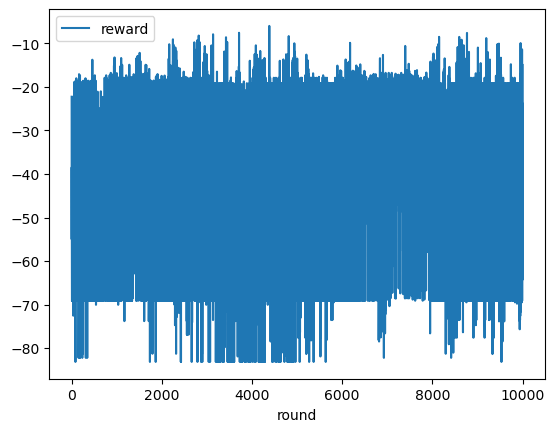

In [4]:
df = pd.read_csv('logs/07-19_09-57_741_10000.csv')
df.groupby(by='round')[['reward']].mean().plot()

<Axes: xlabel='round'>

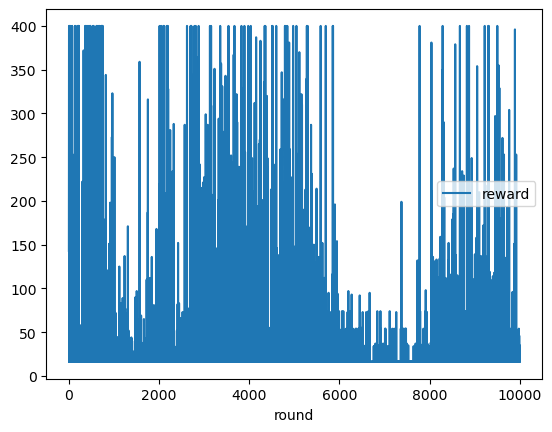

In [6]:
df.groupby(by='round')[['reward']].count().plot()

<Axes: xlabel='round'>

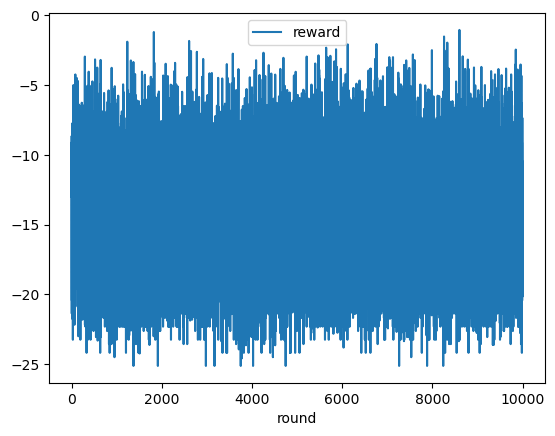

In [7]:
df = pd.read_csv('logs/07-19_10-59_261_10000.csv')
df.groupby(by='round')[['reward']].mean().plot()

<Axes: xlabel='round'>

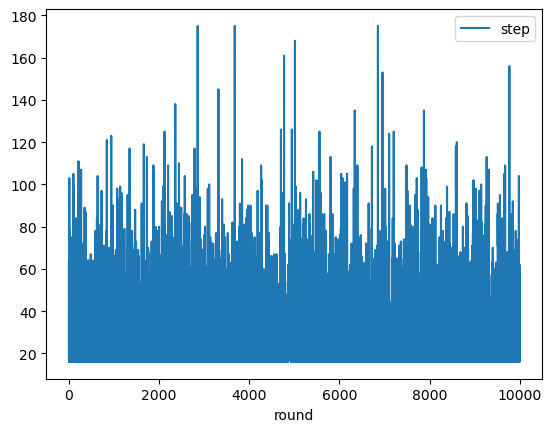

In [9]:
df.groupby(by='round')[['step']].count().plot()

In [2]:
file_list = [name for name in os.listdir('logs') if name != 'mid_agent.log']
file_name = [name.split('.')[0] for name in file_list]
data = [i.split('_') for i in file_name]

for i in range(len(data)):
    data[i].append(file_list[i])

df = pd.DataFrame(data=data, columns=['day', 'time', 'num_features', 'n_rounds', 'link'])
df['datetime'] = pd.to_datetime('2025-' + df['day'] + df['time'], format='%Y-%m-%d%H-%M')
df.drop(columns=['day', 'time'], inplace=True)

In [3]:
newest_model = df.sort_values(by="datetime", ascending=False)['link'].reset_index(drop=True)[0]

<Axes: xlabel='round', ylabel='reward'>

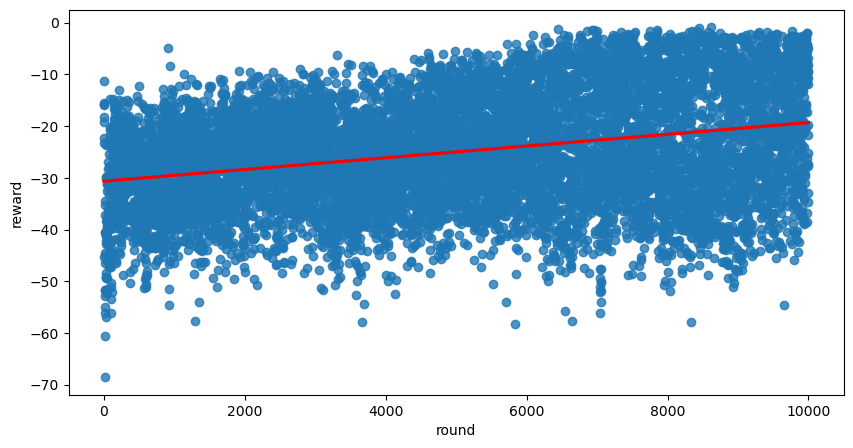

In [4]:
stat = pd.read_csv(f"logs/{newest_model}")

temp = stat.groupby(by='round')[['reward']].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.regplot(x='round', y='reward', data=temp, scatter=True, line_kws={"color": "red"})


<Axes: xlabel='round', ylabel='step'>

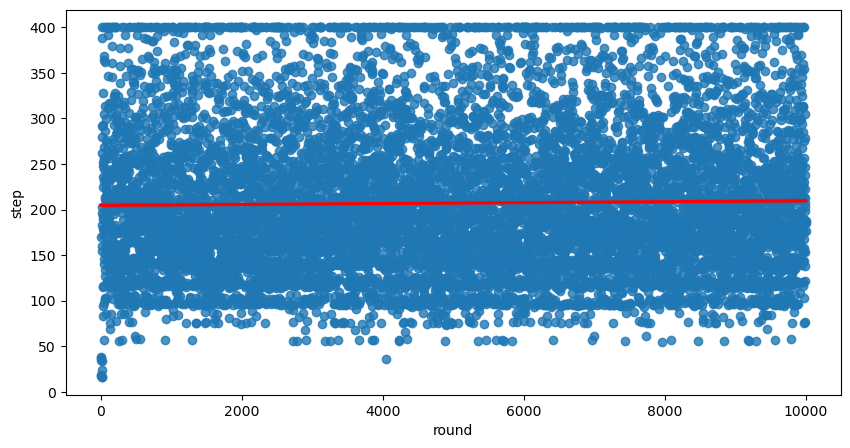

In [104]:
temp = stat.groupby(by='round')[['step']].count().reset_index()
plt.figure(figsize=(10, 5))
sns.regplot(x='round', y='step', data=temp, scatter=True, line_kws={"color": "red"})